In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat
# import rosbags
import json
import open3d as o3d
import pandas as pd
import os
import copy
from utility import listFiles, quickVizNumpy
from scipy.spatial.transform import Rotation as R
from numpy import cos, sin, sqrt, arctan2, array
import torch.nn as nn
### fucking around
from pretrain import loadDataFromRegisteredSlam, cart2sph, preProcess
from train import getSamplesAndTarget, getSpacing
# from visualize import visualizeDir


In [2]:
name = r'building_with_rotation'
path = r'datasets/registered/' + name + r'.json'
data = loadDataFromRegisteredSlam(path)
# training_data = preProcess(data)
# np.random.shuffle(training_data)

<function matplotlib.pyplot.show(close=None, block=None)>

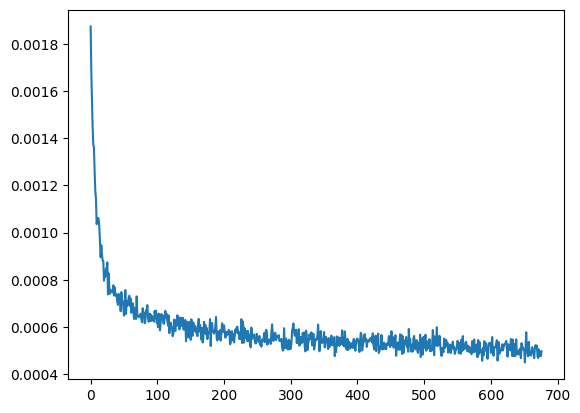

In [17]:
path = r'/home/ansonhon/anson/thesis/LiDAR_NeRF/local/losses_record/ver_euclidean_trial3_losses.npy'
losses = np.load(path)
plt.plot(losses[4:])
plt.show

In [7]:
losses[-1]

0.00045436603249982

In [29]:
temp = np.arange(0.5,-0.5,-1/500)
temp2 = np.arange(0.5,-0.5,-1/500)
grid_x, grid_y = np.meshgrid(temp,temp2)

In [12]:
data_path = r'datasets/training_euclidean/round_plant2.npy'
with open(data_path, 'rb') as file:
    training_data_np = np.load(file)
# get poitns for creating mask
np.random.shuffle(training_data_np)
pts_np = training_data_np[0:500000, 6:9] / 0.024429254132039887


# Load dummy csv
df_temp = pd.read_csv('local/visualize/dummy.csv')
df_temp = df_temp.head(pts_np.shape[0])

# write to dummy csv
df_temp['X'] = pts_np[:,0]
df_temp['Y'] = pts_np[:,1]
df_temp['Z'] = pts_np[:,2]

out_path = r'/home/ansonhon/anson/thesis/LiDAR_NeRF/local/visualize/visualize.csv'
df_temp.to_csv(out_path, index=False)
print("Data written to ", out_path)

Data written to  /home/ansonhon/anson/thesis/LiDAR_NeRF/local/visualize/visualize.csv
